#### 2020鼠年鼠战 Mickey Vs Jerry  
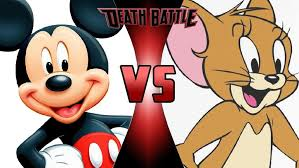

##### 从 fast.ai 读入一些相关的功能模块

In [37]:
from fastai.vision import *

##### 1.数据（Data）
这里的任务是做分类。因此需要有标注的训练数据。

In [38]:
path = Path('imgs')

In [89]:
# data = ImageDataBunch.from_folder(path, test='test', ds_tfms=get_transforms(), size=224)
data = ImageDataBunch.from_folder(path, test='test', size=224,bs=16)

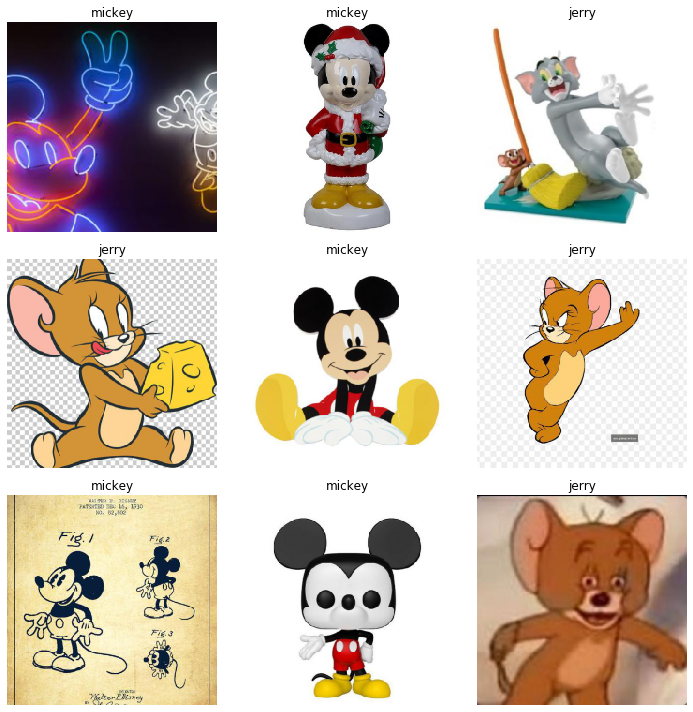

In [90]:
data.show_batch(rows=3, figsize=(10,10))

##### 类别数，训练集、验证集、测试集图片数量

In [91]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds),len(data.test_ds)

(['jerry', 'mickey'], 2, 215, 29, 9)

##### 2.模型结构（Architecture）
让机器做图片分类，需要使用卷积神经网络（Convolutional Neural Network）来表征图片上的像素信息构成的特征。

In [42]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [98]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.311080,0.677663,0.862069,01:50


##### 3.损失度量（Loss Metrics）
提供一个标准，衡量机器对某项任务的处理水平。评判模型的分类效果如何。

In [104]:
interp = ClassificationInterpretation.from_learner(learn)

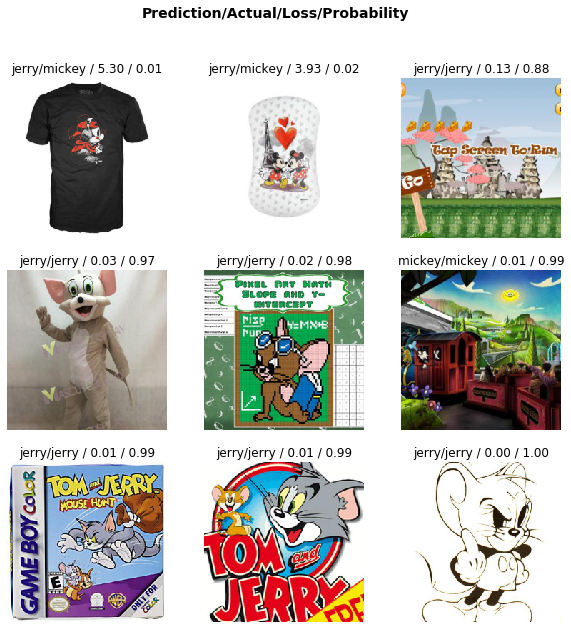

In [105]:
interp.plot_top_losses(9, figsize=(10,10))

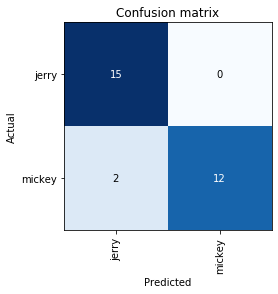

In [106]:
interp.plot_confusion_matrix()

##### 在训练集上的推理表现

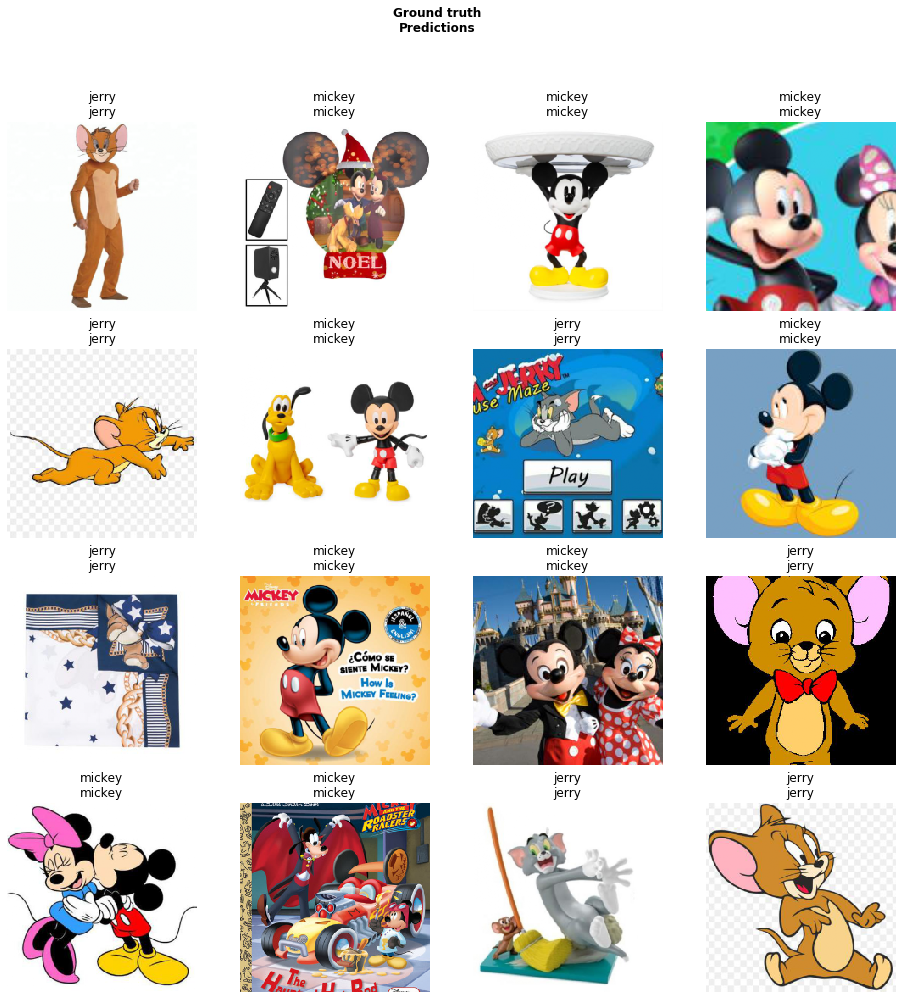

In [108]:
learn.show_results(ds_type=DatasetType.Train,rows=4)

##### 在验证集上的推理表现

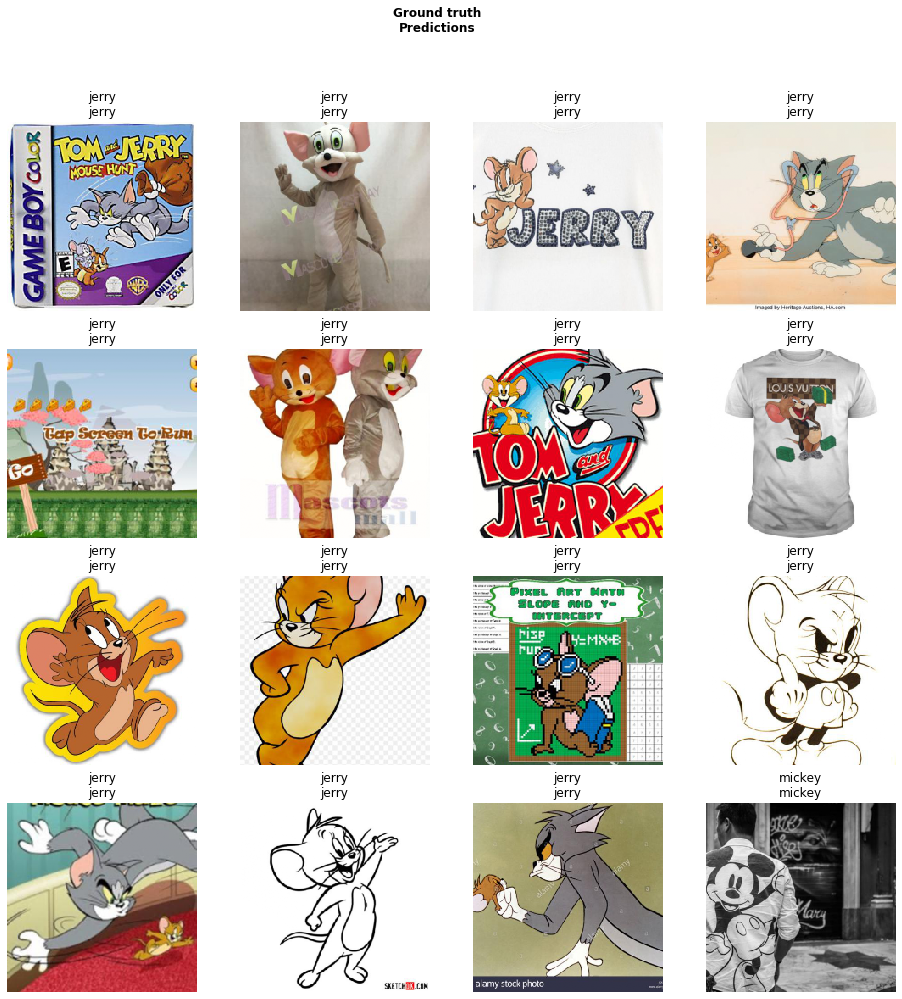

In [111]:
learn.show_results(ds_type=DatasetType.Valid,rows=4)

##### 在测试集上的推理表现

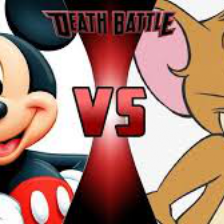

In [112]:
img = data.test_ds[8][0]
img

In [113]:
data.classes

['jerry', 'mickey']

In [114]:
learn.predict(img)

(Category jerry, tensor(0), tensor([0.6623, 0.3377]))

##### 根据上面推理效果优化超参数继续训练模型

In [102]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.352022,0.423018,0.931035,01:41
1,0.209462,0.323569,0.931035,01:34
2,0.137460,0.325653,0.931035,00:45
